In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Importing and understanding data

In [83]:
train_data = pd.read_csv(r"/kaggle/input/titanic/train.csv")
test_data = pd.read_csv(r"/kaggle/input/titanic/test.csv")


In [84]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
train_data = train_data.drop(['PassengerId'],axis = 1)
test_data = test_data.drop(['PassengerId'],axis = 1) #Add the Passenger Id in the submission file

### Missing Values

In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Missing values in Age, Cabin and Embarked

In [88]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


Missing values in Age, Cabin and Fare

In [89]:
train_data['Survived'].value_counts()/train_data.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

So the survival rate of a person in titanic was 38.38%

### Let's analyse Pclass first

In [90]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Lower Pclass has higher chances of survival.

Lets reverse the order such that more weight is given to the Pclass 1. 
Then lets change the range from -1 to 1

In [91]:
mapping = {1:1, 2:0, 3:-1}

train_data['Pclass'] = train_data['Pclass'].map(mapping)
test_data['Pclass'] = test_data['Pclass'].map(mapping)

## Analysing Gender

In [92]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


It's clearly visible that survival chance of females is much higher than males.

Binary Encoding 'Sex' in both train and test data.

In [93]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data['Sex'] =le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.fit_transform(test_data['Sex'])

### SibSp and Parch

In [94]:
train_data[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


More than 2 siblings reduce the chance of survival.

In [95]:
train_data[['Parch','Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Value of more than 3 reduces the chances of survival.

Combining 'Sibsp' and 'Parch' to see the family size.

In [96]:
train_data['family_size'] = train_data['SibSp'] + train_data['Parch']

In [97]:
train_data[['family_size', 'Survived']].groupby(['family_size']).mean()

,Survived
family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


Better patterns can be seen when the 2 columns are seperate.

In [98]:
train_data = train_data.drop(['family_size'],axis = 1)

We will create 3 groups for SibSp and for Parch.

In [99]:
#For train data

SibSp_ = []
for i in train_data['SibSp']:
    if i > 2:
        SibSp_.append(-1)
    elif i == 1 or i == 2:
        SibSp_.append(1)
    else:
        SibSp_.append(0)


Parch_ = []
for i in train_data['Parch']:
    if i > 3:
        Parch_.append(-1)
    elif i == 1 or i == 2 or i == 3:
        Parch_.append(1)
    else:
        Parch_.append(0)

train_data['SibSp_'] = SibSp_
train_data['Parch_'] = Parch_
train_data = train_data.drop(['SibSp','Parch'],axis = 1)
        
#For test data

SibSp_ = []
for i in test_data['SibSp']:
    if i > 2:
        SibSp_.append(-1)
    elif i == 1 or i == 2:
        SibSp_.append(1)
    else:
        SibSp_.append(0)


Parch_ = []
for i in test_data['Parch']:
    if i > 3:
        Parch_.append(-1)
    elif i == 1 or i == 2 or i == 3:
        Parch_.append(1)
    else:
        Parch_.append(0)
        

test_data['SibSp_'] = SibSp_
test_data['Parch_'] = Parch_

test_data = test_data.drop(['SibSp','Parch'],axis = 1)

Value of 0 stays as it is.
Values more than 2 in SibSp and more than 3 in Parch are assigned class -1 and remaining values are assigned 1.

### Cabin

In [100]:
train_data = train_data.drop(['Cabin'],axis = 1)
test_data = test_data.drop(['Cabin'],axis = 1)

Since there are a lot of missing values in both train and test set, we drop the 'Cabin' column.

### Ticket

In [101]:
train_data = train_data.drop(['Ticket'],axis = 1)
test_data = test_data.drop(['Ticket'],axis = 1)

Since ticket number doesnot provide any relevant information, we drop the 'Ticket' column.

### Embarked

In [102]:
train_data[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


C has a significant high chance of survival as compared to Q and S.

In [103]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Filling the missing values of Embarked with the mode of Embarked i.e. 'S'

In [104]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="most_frequent")

train_data['Embarked'] = si.fit_transform(train_data['Embarked'].values.reshape(-1,1))
test_data['Embarked']  = si.fit_transform(test_data['Embarked'].values.reshape(-1,1))


Creating 2 different classes. One class for 'C' and one class for 'S' and 'Q'

In [105]:
Embarked_ = []

for i in train_data['Embarked']:
    if i == 'C':
        Embarked_.append(1)
    else:
        Embarked_.append(0)
        
train_data['Embarked_'] = Embarked_
        
Embarked_ = []
for i in test_data['Embarked']:
    if i == 'C':
        Embarked_.append(1)
    else:
        Embarked_.append(0)
        
test_data['Embarked_'] = Embarked_

train_data = train_data.drop(['Embarked'],axis = 1)
test_data = test_data.drop(['Embarked'],axis = 1)

In [106]:
train_data['Embarked_'].value_counts()

0    723
1    168
Name: Embarked_, dtype: int64

In [107]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,SibSp_,Parch_,Embarked_
0,0,-1,"Braund, Mr. Owen Harris",1,22.0,7.2500,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,1,0,1
2,1,-1,"Heikkinen, Miss. Laina",0,26.0,7.9250,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,1,0,0
4,0,-1,"Allen, Mr. William Henry",1,35.0,8.0500,0,0,0


### Name

The following function gets the title of the name provided the index of the Name.

In [108]:
def title(data,x):
    end = data.Name[x].split(',')[1]
    word = end.split('.')[0]
    return word[1:]

In [109]:
Title = []
for i in range(len(train_data.Name)):
    Title.append(title(train_data,i))

train_data['Title'] = Title
train_data = train_data.drop(['Name'],axis = 1)

Title = []
for i in range(len(test_data.Name)):
    Title.append(title(test_data,i))

test_data['Title'] = Title
test_data = test_data.drop(['Name'],axis = 1)

In [110]:
print(train_data['Title'].value_counts())
train_data[['Title','Survived']].groupby(['Title']).mean()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


,Survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


In [111]:
train_data['Title'] = train_data['Title'].\
                replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','the Countess'], 'Rare')

train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')


test_data['Title'] = test_data['Title'].\
                replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','the Countess'], 'Rare')

test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

In [112]:
train_data['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [113]:
train_data[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [114]:
test_data.head(10)

,Pclass,Sex,Age,Fare,SibSp_,Parch_,Embarked_,Title
0,-1,1,34.5,7.8292,0,0,0,Mr
1,-1,0,47.0,7.0000,1,0,0,Mrs
2,0,1,62.0,9.6875,0,0,0,Mr
3,-1,1,27.0,8.6625,0,0,0,Mr
4,-1,0,22.0,12.2875,1,1,0,Mrs
5,-1,1,14.0,9.2250,0,0,0,Mr
6,-1,0,30.0,7.6292,0,0,0,Miss
7,0,1,26.0,29.0000,1,1,0,Mr
8,-1,0,18.0,7.2292,0,0,1,Mrs
9,-1,1,21.0,24.1500,1,0,0,Mr


The survival probabilities are quite different for each title.

In [115]:
train_data['Title_copy'] = train_data['Title']
test_data['Title_copy'] = test_data['Title']  #This will be used later to categorize ages.

Performing Onehot encoding

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough') 
train_data = np.array(ct1.fit_transform(train_data))
train_data = pd.DataFrame(train_data)
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough') 
test_data = np.array(ct2.fit_transform(test_data))
test_data = pd.DataFrame(test_data)

In [117]:
cols_train = ['Master','Miss','Mr','Mrs','Rare','Survived','Pclass','Sex','Age','Fare','SibSp_','Parch_','Embarked_','Title_copy']
cols_test = ['Master','Miss','Mr','Mrs','Rare','Pclass','Sex','Age','Fare','SibSp_','Parch_','Embarked_','Title_copy']
train_data.columns = cols_train
test_data.columns = cols_test
train_data.head(10)
test_data.head(10)

,Master,Miss,Mr,Mrs,Rare,Pclass,Sex,Age,Fare,SibSp_,Parch_,Embarked_,Title_copy
0,0.0,0.0,1.0,0.0,0.0,-1,1,34.5,7.8292,0,0,0,Mr
1,0.0,0.0,0.0,1.0,0.0,-1,0,47.0,7.0,1,0,0,Mrs
2,0.0,0.0,1.0,0.0,0.0,0,1,62.0,9.6875,0,0,0,Mr
3,0.0,0.0,1.0,0.0,0.0,-1,1,27.0,8.6625,0,0,0,Mr
4,0.0,0.0,0.0,1.0,0.0,-1,0,22.0,12.2875,1,1,0,Mrs
5,0.0,0.0,1.0,0.0,0.0,-1,1,14.0,9.225,0,0,0,Mr
6,0.0,1.0,0.0,0.0,0.0,-1,0,30.0,7.6292,0,0,0,Miss
7,0.0,0.0,1.0,0.0,0.0,0,1,26.0,29.0,1,1,0,Mr
8,0.0,0.0,0.0,1.0,0.0,-1,0,18.0,7.2292,0,0,1,Mrs
9,0.0,0.0,1.0,0.0,0.0,-1,1,21.0,24.15,1,0,0,Mr


### Fare

We have 1 missing value in the test set. We will replace the missing value with the median.

In [118]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(train_data[['Fare']])
test_data['Fare'] = imputer.transform(test_data[['Fare']])

In [119]:
train_data.Fare.describe()

count     891.00
unique    248.00
top         8.05
freq       43.00
Name: Fare, dtype: float64

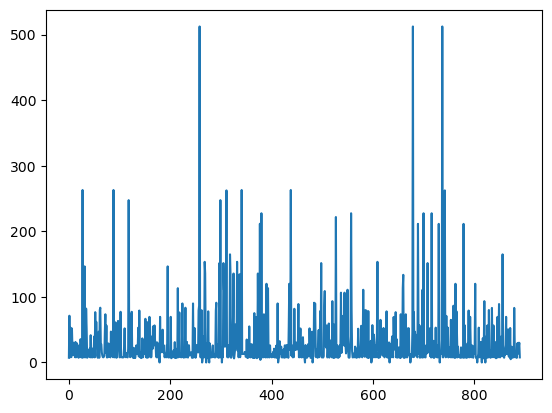

In [120]:
plt.plot(train_data.Fare)

Using Standard Scaler

In [121]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [122]:
train_data['Fare'] = ss.fit_transform(train_data[['Fare']])
test_data['Fare'] = ss.transform(test_data[['Fare']])

### Age

In [123]:
train_data[['Age','Pclass']].groupby(['Pclass']).mean()

,Age
Pclass,
-1,25.140620
0,29.877630
1,38.233441


The first class people had higher age, followed by second class people.

In [124]:
train_data[['Age','Sex']].groupby(['Sex']).mean()

,Age
Sex,
0,27.915709
1,30.726645


Age of males is higher than that of females

In [125]:
train_data[['Age','Title_copy']].groupby(['Title_copy']).mean()

,Age
Title_copy,
Master,4.574167
Miss,21.845638
Mr,32.368090
Mrs,35.788991
Rare,45.545455


Age of Master and Miss is lower while age of Rare is higher.

In [126]:
cat = ['Sex', 'Pclass', 'Title_copy']
df_age = train_data[cat + ['Age']].append(test_data[cat + ['Age']])
df_age_mean = round(df_age.dropna().groupby(cat, as_index=True).median(),1)

In [127]:
def get_age(var, sex, pclass, title):
    """
    This function takes as input the categorical variables 
    and it returns the average age given the categorical variables 
    
    """
    if np.isnan(var):
        mean = df_age_mean['Age'][sex][pclass][title]
    else:
        mean = var
    return mean

In [128]:
train_data['Age'] = train_data.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title_copy), axis=1)
test_data['Age'] = test_data.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title_copy), axis=1)

In [129]:
train_data.Age.describe()

count    891.000000
mean      29.205017
std       13.553407
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

(array([ 58.,  46., 212., 278., 118.,  98.,  46.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

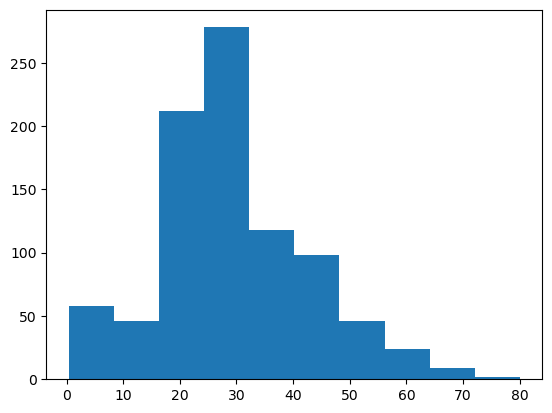

In [130]:
plt.hist(train_data.Age)

Applying Standard Scaler on Age

In [131]:
ss2 = StandardScaler()
train_data['Age'] = ss2.fit_transform(train_data[['Age']])
test_data['Age'] = ss2.transform(test_data[['Age']])

(array([ 58.,  46., 212., 278., 118.,  98.,  46.,  24.,   9.,   2.]),
 array([-2.12501426, -1.53752586, -0.95003746, -0.36254906,  0.22493934,
         0.81242774,  1.39991614,  1.98740454,  2.57489294,  3.16238134,
         3.74986974]),
 <BarContainer object of 10 artists>)

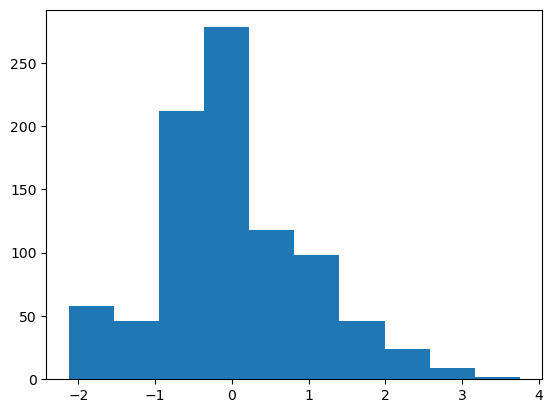

In [132]:
plt.hist(train_data.Age)

In [133]:
train_data = train_data.drop(['Title_copy'],axis = 1)
test_data = test_data.drop(['Title_copy'],axis = 1)

### Applying Machine Learning Models

In [134]:
Y = train_data['Survived']
X = train_data.drop(['Survived'],axis = 1)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2,random_state = 42)

In [136]:
Y_train.dtype
Y_train = Y_train.astype('int')
Y_val = Y_val.astype('int')

In [137]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
from sklearn.svm import SVC

### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, Y_train)
Y_pred = log_classifier.predict(X_val)

In [139]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_val, Y_pred)
print(cm)
accuracy_score(Y_pred,Y_val)

[[90 15]
 [16 58]]


0.8268156424581006

### SVM

In [140]:
svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train)
Y_pred = svm_classifier.predict(X_val)

In [141]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_val, Y_pred)
print(cm)
accuracy_score(Y_pred,Y_val)

[[91 14]
 [18 56]]


0.8212290502793296

### Decision Trees

In [142]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
Y_pred = dt_classifier.predict(X_val)

In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_val, Y_pred)
print(cm)
accuracy_score(Y_pred,Y_val)

[[85 20]
 [19 55]]


0.7821229050279329

### Random Forest

In [144]:
rdt_classifier = RandomForestClassifier()
rdt_classifier.fit(X_train, Y_train)
Y_pred = rdt_classifier.predict(X_val)

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_val, Y_pred)
print(cm)
accuracy_score(Y_pred,Y_val)

[[93 12]
 [16 58]]


0.8435754189944135

### XGBoost

In [148]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Master     712 non-null    object 
 1   Miss       712 non-null    object 
 2   Mr         712 non-null    object 
 3   Mrs        712 non-null    object 
 4   Rare       712 non-null    object 
 5   Pclass     712 non-null    object 
 6   Sex        712 non-null    object 
 7   Age        712 non-null    float64
 8   Fare       712 non-null    float64
 9   SibSp_     712 non-null    object 
 10  Parch_     712 non-null    object 
 11  Embarked_  712 non-null    object 
dtypes: float64(2), object(10)
memory usage: 72.3+ KB


In [149]:
X_train['Master'] = X_train['Master'].astype('int')
X_train['Miss'] = X_train['Miss'].astype('int')
X_train['Mr'] = X_train['Mr'].astype('int')
X_train['Mrs'] = X_train['Mrs'].astype('int')
X_train['Rare'] = X_train['Rare'].astype('int')
X_train['Pclass'] = X_train['Pclass'].astype('int')
X_train['Sex'] = X_train['Sex'].astype('int')
X_train['SibSp_'] = X_train['SibSp_'].astype('int')
X_train['Parch_'] = X_train['Parch_'].astype('int')
X_train['Embarked_'] = X_train['Embarked_'].astype('int')

In [150]:
X_val['Master'] = X_val['Master'].astype('int')
X_val['Miss'] = X_val['Miss'].astype('int')
X_val['Mr'] = X_val['Mr'].astype('int')
X_val['Mrs'] = X_val['Mrs'].astype('int')
X_val['Rare'] = X_val['Rare'].astype('int')
X_val['Pclass'] = X_val['Pclass'].astype('int')
X_val['Sex'] = X_val['Sex'].astype('int')
X_val['SibSp_'] = X_val['SibSp_'].astype('int')
X_val['Parch_'] = X_val['Parch_'].astype('int')
X_val['Embarked_'] = X_val['Embarked_'].astype('int')

In [151]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)
Y_pred = xgb_classifier.predict(X_val)

In [152]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_val, Y_pred)
print(cm)
accuracy_score(Y_pred,Y_val)

[[89 16]
 [17 57]]


0.8156424581005587

### Gradient Boosting

In [153]:
xgb_classifier = GradientBoostingClassifier()
xgb_classifier.fit(X_train, Y_train)
Y_pred = xgb_classifier.predict(X_val)

In [154]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_val, Y_pred)
print(cm)
accuracy_score(Y_pred,Y_val)

[[90 15]
 [19 55]]


0.8100558659217877

### Hypertuning the parameters

Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [400, 750]
# Number of features to consider at every split
max_features = ['auto', 'log 2']
# Maximum number of levels in tree
max_depth = [10,15]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]

## Search grid for optimal parameters
rf_param_grid = {"max_depth": max_depth,
              "max_features": max_features,
              "min_samples_split": min_samples_split,
#               "min_samples_leaf": min_samples_leaf,
              "bootstrap": bootstrap,
              "n_estimators" :n_estimators,
              "criterion": ["gini"]}

RFC = RandomForestClassifier()
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=5, scoring="accuracy", verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

print(RFC_best.get_params())

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/para

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


0.8300403821530582

In [165]:
Y_pred_gsRFC = gsRFC.predict(X_val)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_val, Y_pred_gsRFC)
print(cm)
accuracy_score(Y_pred_gsRFC,Y_val)

[[94 11]
 [15 59]]


0.8547486033519553

In [171]:
Y_pred_gsRFC = gsRFC.predict(test_data)
Y_pred_gsRFC = pd.DataFrame(Y_pred_gsRFC)

### Converting to CSV

In [174]:
test_data1 = pd.read_csv(r"/kaggle/input/titanic/test.csv")  #just to get index

In [175]:
index = test_data1['PassengerId']
predictions = pd.concat([index,Y_pred_gsRFC],axis = 1)
predictions.columns = ['PassengerId','Survived']
print(predictions)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [176]:
predictions.to_csv("titanic_pred1.csv", index = False)